# Mine Goals and Assists for Currently Active Players
We will need to mine current NHL rosters using the API. We will reuse filtered even strength data from previous work

In [2]:
import numpy as np 
import pandas as pd 
import pickle    
import requests
import pprint

In [2]:
# API header
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36', 
    "Upgrade-Insecure-Requests": "1",
    "DNT": "1",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate"
}

In [3]:
# load dataset for all event data
with open('input/2019fiveVfive.pkl', 'rb') as f:
    game_data = pickle.load(f)

In [4]:
# load dataset for just shot locations
with open('input/2019evEvents.pkl', 'rb') as f:
    shot_data = pickle.load(f)

### Get Roster Info
Start by mining team IDs

In [5]:
# get a list of team IDs
team_ids = []
r = requests.get(url='https://statsapi.web.nhl.com/api/v1/teams')
d = r.json()

for team in d['teams']:
    team_ids.append(team['id'])
print(len(team_ids))


31


Loop through team IDs and mine each teams roster (fullName)

In [6]:
stats = {}

for team_id in team_ids:
    r = requests.get(url='https://statsapi.web.nhl.com/api/v1/teams/' + str(team_id) + '/roster')
    d = r.json()
    for player in d['roster']:
        name = player['person']['fullName']
        stats[name] = {'goals' : 0, 'assists' : 0}

print(len(stats))        

781


### Get even-strength stats from 2019-20 season (Goals and Assists)

In [7]:
# reset stats to zeros
for player in stats:
    stats[player]['goals'] = 0
    stats[player]['assists'] = 0
    
# start counting from first game of season
for i in range(1, len(game_data)): 
    if game_data[i]['result']['event'] == 'Goal':
        #print(game_data[i])
        for player in game_data[i]['players']:
            if player['playerType'] == 'Scorer':        # Increment player's goal count
                name = player['player']['fullName']
                if name in stats:
                    stats[name]['goals'] = stats[name]['goals'] + 1
            if player['playerType'] == 'Assist':        # Increment player's assist count
                name = player['player']['fullName']
                if name in stats:
                    stats[name]['assists'] = stats[name]['assists'] + 1
print(stats)

{'Sami Vatanen': {'goals': 4, 'assists': 7}, 'Eric Comrie': {'goals': 0, 'assists': 0}, 'Jesper Bratt': {'goals': 15, 'assists': 11}, 'Travis Zajac': {'goals': 7, 'assists': 14}, 'P.K. Subban': {'goals': 5, 'assists': 7}, 'Kyle Palmieri': {'goals': 14, 'assists': 13}, 'Dmitry Kulikov': {'goals': 2, 'assists': 8}, 'Scott Wedgewood': {'goals': 0, 'assists': 0}, 'Matt Tennyson': {'goals': 0, 'assists': 3}, 'Ryan Murray': {'goals': 2, 'assists': 5}, 'Damon Severson': {'goals': 6, 'assists': 16}, 'Connor Carrick': {'goals': 1, 'assists': 5}, 'Nikita Gusev': {'goals': 14, 'assists': 21}, 'Andreas Johnsson': {'goals': 5, 'assists': 12}, 'Will Butcher': {'goals': 3, 'assists': 15}, 'Miles Wood': {'goals': 11, 'assists': 12}, 'Pavel Zacha': {'goals': 3, 'assists': 15}, 'Mackenzie Blackwood': {'goals': 0, 'assists': 0}, 'Nathan Bastian': {'goals': 0, 'assists': 0}, 'Michael McLeod': {'goals': 0, 'assists': 2}, 'Janne Kuokkanen': {'goals': 0, 'assists': 0}, 'Jesper Boqvist': {'goals': 5, 'assists

### Check totals

In [15]:
goals = 0
assists = 0
for player in stats:
    goals = goals + stats[player]['goals']
    assists = assists + stats[player]['assists']

print('Goals: ' + str(goals))
print('Assists: ' + str(assists))
print('Total Points: ' + str(goals + assists))

Goals: 4660
Assists: 7281
Total Points: 11941


### Store data with pickle

In [9]:
year = '2019'
with open('./input/'+year+'evStats.pkl', 'wb') as f:
    pickle.dump(stats, f, pickle.HIGHEST_PROTOCOL)

# Calculate Even Strength Totals for Lines
We will use DailyFaceoff.com for current line combinations

In [18]:
# load dataset for all stats data
with open('input/2019evStats.pkl', 'rb') as f:
    stats = pickle.load(f)
pprint.pprint(stats)

{'Aaron Dell': {'assists': 0, 'goals': 0},
 'Aaron Ekblad': {'assists': 28, 'goals': 5},
 'Adam Boqvist': {'assists': 7, 'goals': 4},
 'Adam Erne': {'assists': 3, 'goals': 2},
 'Adam Fox': {'assists': 21, 'goals': 7},
 'Adam Gaudette': {'assists': 13, 'goals': 8},
 'Adam Henrique': {'assists': 13, 'goals': 21},
 'Adam Larsson': {'assists': 5, 'goals': 1},
 'Adam Lowry': {'assists': 5, 'goals': 3},
 'Adam Pelech': {'assists': 6, 'goals': 1},
 'Adam Ruzicka': {'assists': 0, 'goals': 0},
 'Adin Hill': {'assists': 0, 'goals': 0},
 'Adrian Kempe': {'assists': 11, 'goals': 8},
 'Alec Martinez': {'assists': 9, 'goals': 3},
 'Aleksander Barkov': {'assists': 27, 'goals': 13},
 'Aleksi Saarela': {'assists': 1, 'goals': 2},
 'Alex Biega': {'assists': 3, 'goals': 0},
 'Alex Chiasson': {'assists': 6, 'goals': 5},
 'Alex DeBrincat': {'assists': 20, 'goals': 8},
 'Alex Galchenyuk': {'assists': 11, 'goals': 7},
 'Alex Goligoski': {'assists': 19, 'goals': 2},
 'Alex Iafallo': {'assists': 23, 'goals': 1

 'Sam Steel': {'assists': 9, 'goals': 5},
 'Sami Niku': {'assists': 5, 'goals': 0},
 'Sami Vatanen': {'assists': 7, 'goals': 4},
 'Sammy Blais': {'assists': 7, 'goals': 6},
 'Samuel Girard': {'assists': 18, 'goals': 3},
 'Scott Harrington': {'assists': 7, 'goals': 1},
 'Scott Laughton': {'assists': 12, 'goals': 13},
 'Scott Mayfield': {'assists': 6, 'goals': 5},
 'Scott Wedgewood': {'assists': 0, 'goals': 0},
 'Sean Couturier': {'assists': 27, 'goals': 21},
 'Sean Kuraly': {'assists': 14, 'goals': 6},
 'Sean Monahan': {'assists': 17, 'goals': 16},
 'Sebastian Aho': {'assists': 18, 'goals': 26},
 'Semyon Varlamov': {'assists': 0, 'goals': 0},
 'Sergei Bobrovsky': {'assists': 0, 'goals': 0},
 'Seth Jones': {'assists': 16, 'goals': 4},
 'Shane Bowers': {'assists': 0, 'goals': 0},
 'Shayne Gostisbehere': {'assists': 3, 'goals': 3},
 'Shea Theodore': {'assists': 15, 'goals': 13},
 'Shea Weber': {'assists': 16, 'goals': 12},
 'Sidney Crosby': {'assists': 18, 'goals': 11},
 'Slater Koekkoek':

In [19]:
#### Via DailyFaceoff.com ####
line_players = {
    'CAR_F1' : {'Sebastian Aho', 'Teuvo Teravainen', 'Nino Niederreiter'},
    'CAR_F2' : {'Jesper Fast', 'Vincent Trocheck', 'Andrei Svechnikov'},
    'CAR_F3' : {'Warren Foegele', 'Jordan Staal', 'Martin Necas'},
    'CAR_F4' : {'Ryan Dzingel', 'Morgan Geekie', 'Brock McGinn'},
    
    'EDM_F1' : {'Ryan Nugent-Hopkins', 'Connor McDavid', 'Zack Kassian'},
    'EDM_F2' : {'Dominik Kahun', 'Leon Draisaitl', 'Kailer Yamamoto'},
    'EDM_F3' : {'Tyler Ennis', 'Kyle Turris', 'Jesse Puljujarvi'},
    'EDM_F4' : {'Josh Archibald', 'Jujhar Khaira', 'Alex Chiasson'},
    
    'TOR_F1' : {'Joe Thornton', 'Auston Matthews', 'Mitchell Marner'},
    'TOR_F2' : {'Jimmy Vesey', 'John Tavares', 'William Nylander'},
    'TOR_F3' : {'Ilya Mikheyev', 'Alexander Kerfoot', 'Zach Hyman'},
    'TOR_F4' : {'Alexander Barabanov', 'Jason Spezza', 'Wayne Simmonds'},
}

line_totals = {
    'CAR_F1' : {'goals': 0, 'assists' : 0},
    'CAR_F2' : {'goals': 0, 'assists' : 0},
    'CAR_F3' : {'goals': 0, 'assists' : 0},
    'CAR_F4' : {'goals': 0, 'assists' : 0},
    
    'EDM_F1' : {'goals': 0, 'assists' : 0},
    'EDM_F2' : {'goals': 0, 'assists' : 0},
    'EDM_F3' : {'goals': 0, 'assists' : 0},
    'EDM_F4' : {'goals': 0, 'assists' : 0},
    
    'TOR_F1' : {'goals': 0, 'assists' : 0},
    'TOR_F2' : {'goals': 0, 'assists' : 0},
    'TOR_F3' : {'goals': 0, 'assists' : 0},
    'TOR_F4' : {'goals': 0, 'assists' : 0},
}

In [20]:
pprint.pprint(line_totals)

{'CAR_F1': {'assists': 0, 'goals': 0},
 'CAR_F2': {'assists': 0, 'goals': 0},
 'CAR_F3': {'assists': 0, 'goals': 0},
 'CAR_F4': {'assists': 0, 'goals': 0},
 'EDM_F1': {'assists': 0, 'goals': 0},
 'EDM_F2': {'assists': 0, 'goals': 0},
 'EDM_F3': {'assists': 0, 'goals': 0},
 'EDM_F4': {'assists': 0, 'goals': 0},
 'TOR_F1': {'assists': 0, 'goals': 0},
 'TOR_F2': {'assists': 0, 'goals': 0},
 'TOR_F3': {'assists': 0, 'goals': 0},
 'TOR_F4': {'assists': 0, 'goals': 0}}


In [21]:
# reset line_totals to zeros
for line in line_totals:
    line_totals[line]['goals'] = 0
    line_totals[line]['assists'] = 0

# loop through all players, if player is in one of the lines, append their goals/assists to line_totals
for player in stats:
    for line in line_players:
        if player in line_players[line]:
            print(line + ' ' + player + ' G' + str(stats[player]['goals']) + ' A' + str(stats[player]['assists']))
            line_totals[line]['goals'] = line_totals[line]['goals'] + stats[player]['goals']
            line_totals[line]['assists'] = line_totals[line]['assists'] + stats[player]['assists']
pprint.pprint(line_totals)

CAR_F1 Sebastian Aho G26 A18
TOR_F1 Joe Thornton G4 A19
TOR_F4 Jason Spezza G9 A11
TOR_F4 Wayne Simmonds G3 A13
TOR_F2 John Tavares G18 A19
TOR_F3 Zach Hyman G17 A13
TOR_F2 Jimmy Vesey G8 A10
TOR_F3 Alexander Kerfoot G8 A17
TOR_F2 William Nylander G23 A20
TOR_F1 Mitchell Marner G8 A32
TOR_F1 Auston Matthews G35 A19
TOR_F3 Ilya Mikheyev G7 A15
TOR_F4 Alexander Barabanov G0 A0
CAR_F3 Jordan Staal G6 A17
CAR_F1 Nino Niederreiter G7 A10
CAR_F2 Jesper Fast G10 A17
CAR_F4 Ryan Dzingel G4 A16
CAR_F2 Vincent Trocheck G12 A21
CAR_F1 Teuvo Teravainen G12 A28
CAR_F4 Brock McGinn G5 A10
CAR_F3 Warren Foegele G10 A17
CAR_F3 Martin Necas G11 A14
CAR_F2 Andrei Svechnikov G20 A22
EDM_F3 Kyle Turris G7 A14
EDM_F3 Tyler Ennis G12 A16
EDM_F4 Alex Chiasson G5 A6
EDM_F1 Zack Kassian G15 A19
EDM_F4 Josh Archibald G9 A7
EDM_F1 Ryan Nugent-Hopkins G15 A21
EDM_F4 Jujhar Khaira G6 A4
EDM_F2 Leon Draisaitl G28 A38
EDM_F1 Connor McDavid G23 A31
EDM_F3 Jesse Puljujarvi G0 A0
EDM_F2 Kailer Yamamoto G9 A15
EDM_F2 Do

In [22]:
df = pd.DataFrame.from_dict(line_totals).transpose()

In [23]:
df

,goals,assists
CAR_F1,45,56
CAR_F2,42,60
CAR_F3,27,48
CAR_F4,9,26
EDM_F1,53,71
EDM_F2,48,71
EDM_F3,19,30
EDM_F4,20,17
TOR_F1,47,70
TOR_F2,49,49


### Merge with shot zone data
Load dataset containing shot counts from various zones on ice. Use data to caclulate variability in shot locations for particular lines.

In [24]:
# load dataset for all event data
with open('input/2019evStatsWithShotZones.pkl', 'rb') as f:
    df_stats_w_zones = pickle.load(f)
df_stats_w_zones = df_stats_w_zones.transpose() # transpose so we can do lookups using fullName

In [25]:
# verify that lookups by fullName works correctly
df_stats_w_zones['P.K. Subban']

goals              5.000000
assists            7.000000
zone0              5.000000
zone1              8.000000
zone2             59.000000
zone3              7.000000
zone4             15.000000
zone5              6.000000
zone6             11.000000
totalShots       111.000000
percent_zone0      0.045045
percent_zone1      0.072072
percent_zone2      0.531532
percent_zone3      0.063063
percent_zone4      0.135135
percent_zone5      0.054054
percent_zone6      0.099099
total_percent      1.000000
Name: P.K. Subban, dtype: float64

In [37]:
# update line_totals with zone variables
for line in line_totals:
    for i in range(0,7):
        new_key = 'zone' + str(i)
        line_totals[line][new_key] = 0
        new_key = 'percent_zone' + str(i)
        line_totals[line][new_key] = 0
    line_totals[line]['totalShots'] = 0
    
# sum num shots in each zone for all line combinations
for line in line_totals:
    if line in line_players:
        for player in line_players[line]:
            if player in df_stats_w_zones:
                for i in range(0,7):
                    cur_zone = 'zone' + str(i)
                    # add count of each shot in zone
                    line_totals[line][cur_zone] = line_totals[line][cur_zone] + df_stats_w_zones[player][cur_zone]
                    
                    # add proportion of shots in each zone for each players...some lines have many less shots
                    # which affects variance calculation. Try to anneal this by treating each player as having
                    # taken an even amount of shots
                    percent_cur_zone = 'percent_zone' + str(i)
                    line_totals[line][percent_cur_zone] = line_totals[line][percent_cur_zone] + df_stats_w_zones[player][percent_cur_zone]
            elif player not in df_stats_w_zones:
                for i in range(0,7):
                    # when there is no shot data for a player, assume player shoots from all zones equally
                    # this is a very crude assumption but it affects few players
                    percent_cur_zone = 'percent_zone' + str(i)
                    line_totals[line][percent_cur_zone] = line_totals[line][percent_cur_zone] + (1/7)
                    
# divide sum of proportions by 3 (the number of players on a line)
for line in line_totals:
    for i in range(0,7):
        percent_cur_zone = 'percent_zone' + str(i)
        line_totals[line][percent_cur_zone] = line_totals[line][percent_cur_zone] / 3

# sum total num of shots in all zones for a line
for line in line_totals:
    line_totals[line]['totalShots'] = line_totals[line]['zone0']     \
                                        + line_totals[line]['zone1'] \
                                        + line_totals[line]['zone2'] \
                                        + line_totals[line]['zone3'] \
                                        + line_totals[line]['zone4'] \
                                        + line_totals[line]['zone5'] \
                                        + line_totals[line]['zone6']

In [92]:
# update line_totals with zone variables
for line in line_totals:
    for i in range(0,7):
        new_key = 'zone' + str(i)
        line_totals[line][new_key] = 0
        new_key = 'percent_zone' + str(i)
        line_totals[line][new_key] = 0
    line_totals[line]['totalShots'] = 0
    
# sum num shots in each zone for all line combinations
for line in line_totals:
    if line in line_players:
        for player in line_players[line]:
            if player in df_stats_w_zones:
                for i in range(0,7):
                    cur_zone = 'zone' + str(i)
                    # add count of each shot in zone
                    line_totals[line][cur_zone] = line_totals[line][cur_zone] + df_stats_w_zones[player][cur_zone]

# sum total num of shots in all zones for a line
for line in line_totals:
    line_totals[line]['totalShots'] = line_totals[line]['zone0']     \
                                        + line_totals[line]['zone1'] \
                                        + line_totals[line]['zone2'] \
                                        + line_totals[line]['zone3'] \
                                        + line_totals[line]['zone4'] \
                                        + line_totals[line]['zone5'] \
                                        + line_totals[line]['zone6']
    
# calculate proportion of shots from each zone
for line in line_totals:
    for i in range(0,7):
        cur_zone = 'zone' + str(i)
        percent_cur_zone = 'percent_zone' + str(i)
        line_totals[line][percent_cur_zone] = line_totals[line][cur_zone] / line_totals[line]['totalShots']

In [93]:
pprint.pprint(line_totals)

{'CAR_F1': {'assists': 56,
            'goals': 45,
            'percent_zone0': 0.38935574229691877,
            'percent_zone1': 0.058823529411764705,
            'percent_zone2': 0.04481792717086835,
            'percent_zone3': 0.15126050420168066,
            'percent_zone4': 0.09243697478991597,
            'percent_zone5': 0.1092436974789916,
            'percent_zone6': 0.15406162464985995,
            'totalShots': 357.0,
            'zone0': 139.0,
            'zone1': 21.0,
            'zone2': 16.0,
            'zone3': 54.0,
            'zone4': 33.0,
            'zone5': 39.0,
            'zone6': 55.0},
 'CAR_F2': {'assists': 60,
            'goals': 42,
            'percent_zone0': 0.47678018575851394,
            'percent_zone1': 0.018575851393188854,
            'percent_zone2': 0.030959752321981424,
            'percent_zone3': 0.13003095975232198,
            'percent_zone4': 0.02476780185758514,
            'percent_zone5': 0.1609907120743034,
            'percent_

### Calculate Variability in Shot Location for each Line Combination

In [94]:
# create DataFrame for line_totals
df_totals = pd.DataFrame(line_totals).transpose()
df_totals

,goals,assists,zone0,zone1,zone2,zone3,zone4,zone5,zone6,totalShots,percent_zone0,percent_zone1,percent_zone2,percent_zone3,percent_zone4,percent_zone5,percent_zone6
CAR_F1,45.0,56.0,139.0,21.0,16.0,54.0,33.0,39.0,55.0,357.0,0.389356,0.058824,0.044818,0.151261,0.092437,0.109244,0.154062
CAR_F2,42.0,60.0,154.0,6.0,10.0,42.0,8.0,52.0,51.0,323.0,0.476780,0.018576,0.030960,0.130031,0.024768,0.160991,0.157895
CAR_F3,27.0,48.0,135.0,9.0,13.0,36.0,12.0,44.0,50.0,299.0,0.451505,0.030100,0.043478,0.120401,0.040134,0.147157,0.167224
CAR_F4,9.0,26.0,72.0,6.0,5.0,21.0,6.0,23.0,21.0,154.0,0.467532,0.038961,0.032468,0.136364,0.038961,0.149351,0.136364
EDM_F1,53.0,71.0,165.0,15.0,16.0,43.0,10.0,55.0,61.0,365.0,0.452055,0.041096,0.043836,0.117808,0.027397,0.150685,0.167123
EDM_F2,48.0,71.0,125.0,8.0,13.0,29.0,17.0,41.0,37.0,270.0,0.462963,0.029630,0.048148,0.107407,0.062963,0.151852,0.137037
EDM_F3,19.0,30.0,98.0,2.0,7.0,34.0,7.0,32.0,19.0,199.0,0.492462,0.010050,0.035176,0.170854,0.035176,0.160804,0.095477
EDM_F4,20.0,17.0,68.0,6.0,16.0,31.0,12.0,34.0,22.0,189.0,0.359788,0.031746,0.084656,0.164021,0.063492,0.179894,0.116402
TOR_F1,47.0,70.0,136.0,13.0,15.0,61.0,15.0,70.0,69.0,379.0,0.358839,0.034301,0.039578,0.160950,0.039578,0.184697,0.182058
TOR_F2,49.0,49.0,179.0,13.0,15.0,63.0,17.0,66.0,60.0,413.0,0.433414,0.031477,0.036320,0.152542,0.041162,0.159806,0.145278


In [95]:
# using counts, calculate variance using all zones
df_totals_zones_all_counts = df_totals[['zone0', 'zone1', 'zone2', 'zone3', 'zone4', 'zone5', 'zone6']].transpose()
var_zones_all_counts = pd.DataFrame([df_totals_zones_all_counts.mean(), df_totals_zones_all_counts.std(), df_totals_zones_all_counts.var()], index=['Mean', 'Std. dev', 'Variance']).transpose()
print(var_zones_all_counts)
print()

# using proportions, calculate variance using all zones
df_totals_zones_all_prop = df_totals[['percent_zone0', 'percent_zone1', 'percent_zone2', 'percent_zone3', 'percent_zone4', 'percent_zone5', 'percent_zone6']].transpose()
var_zones_all_prop = pd.DataFrame([df_totals_zones_all_prop.mean(), df_totals_zones_all_prop.std(), df_totals_zones_all_prop.var()], index=['Mean', 'Std. dev', 'Variance']).transpose()
print(var_zones_all_prop)
print()

             Mean   Std. dev     Variance
CAR_F1  51.000000  41.557190  1727.000000
CAR_F2  46.142857  51.770096  2680.142857
CAR_F3  42.714286  43.930681  1929.904762
CAR_F4  22.000000  23.466288   550.666667
EDM_F1  52.142857  53.803434  2894.809524
EDM_F2  38.571429  40.049374  1603.952381
EDM_F3  28.428571  33.140394  1098.285714
EDM_F4  27.000000  20.647841   426.333333
TOR_F1  54.142857  44.678215  1996.142857
TOR_F2  59.000000  58.140634  3380.333333
TOR_F3  35.857143  41.180208  1695.809524
TOR_F4  20.857143  19.616562   384.809524

            Mean  Std. dev  Variance
CAR_F1  0.142857  0.116407  0.013551
CAR_F2  0.142857  0.160279  0.025689
CAR_F3  0.142857  0.146925  0.021587
CAR_F4  0.142857  0.152378  0.023219
EDM_F1  0.142857  0.147407  0.021729
EDM_F2  0.142857  0.148331  0.022002
EDM_F3  0.142857  0.166535  0.027734
EDM_F4  0.142857  0.109248  0.011935
TOR_F1  0.142857  0.117884  0.013897
TOR_F2  0.142857  0.140776  0.019818
TOR_F3  0.142857  0.164065  0.026917
TOR_F4  0

In [96]:
# # calculate variance using only zones deeper in offensive zone -- zones 0, 2, 3, and 6
# df_totals_zones_partial = df_totals[['zone0', 'zone2', 'zone3', 'zone6']].transpose()
# var_zones_partial = pd.DataFrame([df_totals_zones_partial.mean(), df_totals_zones_partial.std(), df_totals_zones_partial.var()], index=['Mean', 'Std. dev', 'Variance']).transpose()
# var_zones_partial

# using counts, calculate variance using  zones 0, 3, 5, and 6
df_totals_zones_partial_counts = df_totals[['zone0', 'zone3', 'zone5', 'zone6']].transpose()
var_zones_partial_counts = pd.DataFrame([df_totals_zones_partial_counts.mean(), df_totals_zones_partial_counts.std(), df_totals_zones_partial_counts.var()], index=['Mean', 'Std. dev', 'Variance']).transpose()
print(var_zones_partial_counts)
print()

# using proportions, calculate variance using zones 0, 3, 5, and 6
df_totals_zones_partial_prop = df_totals[['percent_zone0', 'percent_zone3', 'percent_zone5', 'percent_zone6']].transpose()
var_zones_partial_prop = pd.DataFrame([df_totals_zones_partial_prop.mean(), df_totals_zones_partial_prop.std(), df_totals_zones_partial_prop.var()], index=['Mean', 'Std. dev', 'Variance']).transpose()
print(var_zones_partial_prop)
print()

         Mean   Std. dev     Variance
CAR_F1  71.75  45.426681  2063.583333
CAR_F2  74.75  53.024365  2811.583333
CAR_F3  66.25  46.190728  2133.583333
CAR_F4  34.25  25.184321   634.250000
EDM_F1  81.00  56.497788  3192.000000
EDM_F2  58.00  44.944410  2020.000000
EDM_F3  45.75  35.462421  1257.583333
EDM_F4  38.75  20.155644   406.250000
TOR_F1  84.00  34.899857  1218.000000
TOR_F2  92.00  58.051701  3370.000000
TOR_F3  53.75  48.897001  2390.916667
TOR_F4  32.00  19.252705   370.666667

            Mean  Std. dev  Variance
CAR_F1  0.200980  0.127246  0.016191
CAR_F2  0.231424  0.164162  0.026949
CAR_F3  0.221572  0.154484  0.023865
CAR_F4  0.222403  0.163535  0.026744
EDM_F1  0.221918  0.154788  0.023959
EDM_F2  0.214815  0.166461  0.027709
EDM_F3  0.229899  0.178203  0.031756
EDM_F4  0.205026  0.106644  0.011373
TOR_F1  0.221636  0.092084  0.008479
TOR_F2  0.222760  0.140561  0.019757
TOR_F3  0.214143  0.194809  0.037950
TOR_F4  0.219178  0.131868  0.017389



In [98]:
# merge with df_totals
df_totals['var_all_zones_counts'] = var_zones_all_counts['Variance']
df_totals['var_all_zones_prop'] = var_zones_all_prop['Variance']

df_totals['var_partial_zones_counts'] = var_zones_partial_counts['Variance']
df_totals['var_partial_zones_prop'] = var_zones_partial_prop['Variance']

df_totals

,goals,assists,zone0,zone1,zone2,zone3,zone4,zone5,zone6,totalShots,...,percent_zone5,percent_zone6,std_dev_all_zones_counts,var_all_zones_counts,std_dev_all_zones_prop,var_all_zones_prop,std_dev_partial_zones_counts,var_partial_zones_counts,std_dev_partial_zones_prop,var_partial_zones_prop
CAR_F1,45.0,56.0,139.0,21.0,16.0,54.0,33.0,39.0,55.0,357.0,...,0.109244,0.154062,41.557190,1727.000000,0.116407,0.013551,45.426681,2063.583333,0.127246,0.016191
CAR_F2,42.0,60.0,154.0,6.0,10.0,42.0,8.0,52.0,51.0,323.0,...,0.160991,0.157895,51.770096,2680.142857,0.160279,0.025689,53.024365,2811.583333,0.164162,0.026949
CAR_F3,27.0,48.0,135.0,9.0,13.0,36.0,12.0,44.0,50.0,299.0,...,0.147157,0.167224,43.930681,1929.904762,0.146925,0.021587,46.190728,2133.583333,0.154484,0.023865
CAR_F4,9.0,26.0,72.0,6.0,5.0,21.0,6.0,23.0,21.0,154.0,...,0.149351,0.136364,23.466288,550.666667,0.152378,0.023219,25.184321,634.250000,0.163535,0.026744
EDM_F1,53.0,71.0,165.0,15.0,16.0,43.0,10.0,55.0,61.0,365.0,...,0.150685,0.167123,53.803434,2894.809524,0.147407,0.021729,56.497788,3192.000000,0.154788,0.023959
EDM_F2,48.0,71.0,125.0,8.0,13.0,29.0,17.0,41.0,37.0,270.0,...,0.151852,0.137037,40.049374,1603.952381,0.148331,0.022002,44.944410,2020.000000,0.166461,0.027709
EDM_F3,19.0,30.0,98.0,2.0,7.0,34.0,7.0,32.0,19.0,199.0,...,0.160804,0.095477,33.140394,1098.285714,0.166535,0.027734,35.462421,1257.583333,0.178203,0.031756
EDM_F4,20.0,17.0,68.0,6.0,16.0,31.0,12.0,34.0,22.0,189.0,...,0.179894,0.116402,20.647841,426.333333,0.109248,0.011935,20.155644,406.250000,0.106644,0.011373
TOR_F1,47.0,70.0,136.0,13.0,15.0,61.0,15.0,70.0,69.0,379.0,...,0.184697,0.182058,44.678215,1996.142857,0.117884,0.013897,34.899857,1218.000000,0.092084,0.008479
TOR_F2,49.0,49.0,179.0,13.0,15.0,63.0,17.0,66.0,60.0,413.0,...,0.159806,0.145278,58.140634,3380.333333,0.140776,0.019818,58.051701,3370.000000,0.140561,0.019757


In [62]:
# save to pickle file
year = '2019'
with open('./input/'+year+'evStatsAndVariance.pkl', 'wb') as f:
    pickle.dump(df_totals, f, pickle.HIGHEST_PROTOCOL)

### Analyze Relationship Between Variance and Goal Production

In [63]:
# load dataset for all event data
with open('input/2019evStatsAndVariance.pkl', 'rb') as f:
    df_stats_var = pickle.load(f)

In [99]:
# print df showing goals and variances
df_stats_var[['goals', 'var_all_zones_counts', 'var_all_zones_prop']]

,goals,var_all_zones_counts,var_all_zones_prop
CAR_F1,45.0,1727.000000,0.013356
CAR_F2,42.0,2680.142857,0.027887
CAR_F3,27.0,1929.904762,0.020448
CAR_F4,9.0,550.666667,0.010312
EDM_F1,53.0,2894.809524,0.021995
EDM_F2,48.0,1603.952381,0.022366
EDM_F3,19.0,1098.285714,0.010959
EDM_F4,20.0,426.333333,0.012096
TOR_F1,47.0,1996.142857,0.013905
TOR_F2,49.0,3380.333333,0.021156


<AxesSubplot:xlabel='var_all_zones_prop', ylabel='goals'>

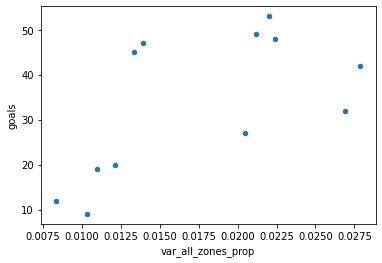

In [115]:
# Plot relationship between variance in proportion of shots and number of goals
# We see that increased variance between shot distribution results in increased goals
#### This is evidence against our hypothesis ####
df_stats_var.plot.scatter(x='var_all_zones_prop', y='goals')

<AxesSubplot:xlabel='var_all_zones_prop', ylabel='totalShots'>

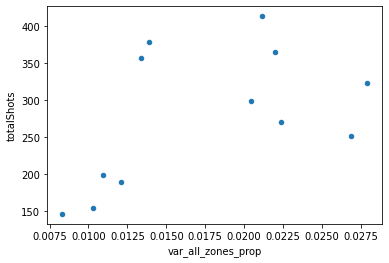

In [116]:
df_stats_var.plot.scatter(x='var_all_zones_prop', y='totalShots')

<AxesSubplot:xlabel='percent_zone0', ylabel='goals'>

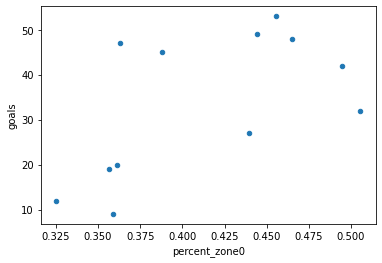

In [106]:
# it appears that lines that shoot more shots  from zone0 produce more goals
df_stats_var.plot.scatter(x='percent_zone0', y='goals')

<AxesSubplot:xlabel='percent_zone6', ylabel='goals'>

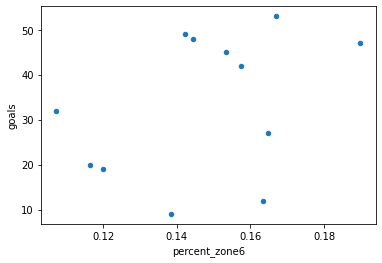

In [107]:
# it appears that lines that shoot more shots  from zone0 produce more goals
df_stats_var.plot.scatter(x='percent_zone6', y='goals')

In [114]:
df_shots_GTE_twohundred = df_stats_var[df_stats_var['totalShots'] >= 200]
df_shots_GTE_twohundred[['goals', 'var_partial_zones_prop', 'var_all_zones_prop', 'percent_zone0', 'percent_zone6', 'percent_zone3']]

,goals,var_partial_zones_prop,var_all_zones_prop,percent_zone0,percent_zone6,percent_zone3
CAR_F1,45.0,0.016271,0.013356,0.388165,0.153397,0.150821
CAR_F2,42.0,0.030629,0.027887,0.494623,0.157368,0.129450
CAR_F3,27.0,0.021221,0.020448,0.439434,0.164803,0.126919
EDM_F1,53.0,0.025218,0.021995,0.455683,0.166983,0.108050
EDM_F2,48.0,0.028134,0.022366,0.465019,0.144531,0.104433
TOR_F1,47.0,0.009265,0.013905,0.363159,0.189899,0.161027
TOR_F2,49.0,0.021639,0.021156,0.444370,0.142374,0.166581
TOR_F3,32.0,0.037774,0.026866,0.505562,0.107206,0.128575


<AxesSubplot:xlabel='var_partial_zones_prop', ylabel='goals'>

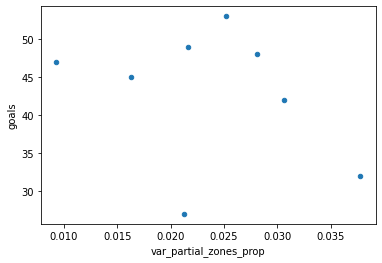

In [109]:
df_shots_GTE_twohundred.plot.scatter(x='var_partial_zones_prop', y='goals')